# SVM, soft margin on Moon data classification

In this notebook, the following tasks are accomplished:
1. import and visualize moon data using bonnerlib library
2. train on a noisy data set by tuning soft margin SVM hyperparameters C and Gamma
3. visualize training and testing errors for varying values of C and gamma
4. discuss hyperparameters' effect on underfitting and overfitting

In [27]:
# import libraries
from sklearn.svm import SVC 
from sklearn import datasets 
import matplotlib.pyplot as plt 
import numpy as np

# for reproductibility
import random
random.seed = 0
np.random.seed = 0
seed = 0

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

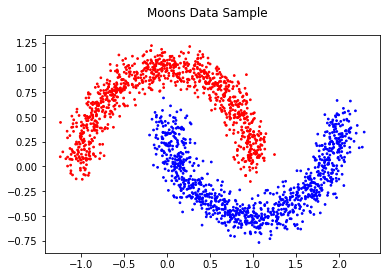

In [28]:
# function for display raw data
def plot_data(data):
    X,y = data
    fig = plt
    fig.figure()
    fig.suptitle('Moons Data Sample') 
    colors = np.array(['r','b']) 
    fig.scatter(X[:, 0], X[:, 1], color=colors[y],s=3)
    return fig

data = datasets.make_moons(n_samples=2000, noise=0.1) 
plot_data(data)

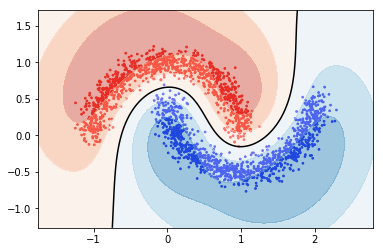

In [29]:
# train a SVM: first set the parameters and then fit to the data using the RBF kernel (default)
clf = SVC(gamma=1.0, C=1.0)
X,y = data
clf.fit(X,y)
import bonnerlib
bonnerlib.dfContour(clf,data)
# bonnerlib.df3D(clf,data)

## I

Generate two random samples of Moons data, a training set with 200 points and a test set with 2000 points. Both sets should have a noise level of 0.4 (so that the two moon classes overlap significantly). Use these two data sets throughout the rest of this question. In the questions below, you will be evaluating the training error and the test error of an SVM. The training error is the error on the training data,and the test error is the error on the test data.

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

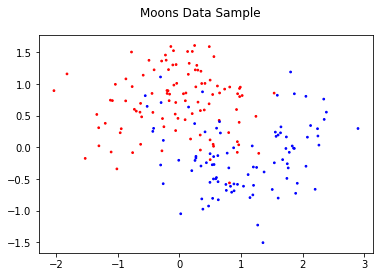

In [30]:
# I: parse data into training and testing set
X,y = datasets.make_moons(n_samples=2200, noise= 0.4,random_state = seed)
X_train = X[0:199]
y_train = y[0:199]
X_test = X[200:]
y_test = y[200:]
plot_data((X_train,y_train))

## II

A soft-margin SVM with an RBF kernel requires two parameters, C and γ. Write a Python program that carries out an exhaustive grid search for the best values of these parameters. (Do not use Scikit-learn’s build-in grid-search facility.) You should consider values of C and γ spread over several orders of magnitude. Choose them so that the values of log C are equally spaced, and likewise for log γ. You should use at least five values per order-of-magnitude (i.e., per factor-of-ten). (You may find the function numpy.linspace useful.) For each combination of values of C and γ, fit an SVM to the training data and evaluate its test error. Save the combination of C and γ that gives the lowest test error. Call these values C0 and γ0. Report these values as well as the test error. Generate and hand in a contour plot of the decision function with the decision boundary and margins highlighted.

In [31]:
# II:
grid_size = 30
gammas = np.logspace(-3,5,grid_size)
Cs = np.logspace(-2,4,grid_size)

# for holding accuracy results
scores = np.zeros([grid_size,grid_size])
for i in range(len(gammas)):
    for j in range(len(Cs)):
        gamma = gammas[i]
        C = Cs[j]
        
        # fit to training data
        clf = SVC(gamma=gamma,C=C)
        clf.fit(X_train,y_train)
    
        # score on test data
        scores[i,j] = clf.score(X_test,y_test)
        

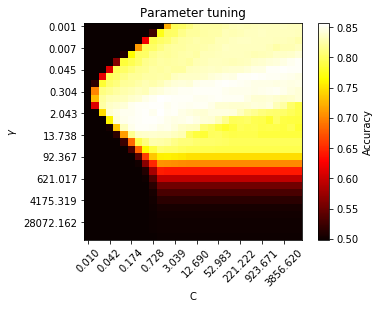

In [32]:
plt.imshow(scores, cmap='hot', interpolation='nearest')
plt.ylabel("$\gamma$")
plt.xlabel("C")
plt.title("Parameter tuning")

n_labels = 9
step = int(grid_size / (n_labels - 1)) 
x_labels = Cs[::step]
plt.xticks(np.arange(0,grid_size,step), ["{:.3f}".format(lab) for lab in Cs[::step]],rotation = 45)
y_labels = gammas[::step]
plt.yticks(np.arange(0,grid_size,step), ["{:.3f}".format(lab) for lab in gammas[::step]])

cb = plt.colorbar()
cb.set_label('Accuracy')

plt.show()

In [33]:
# get the best parameters
index = np.argmax(scores)
C_0 = Cs[index//grid_size]
gamma_0 = gammas[index%grid_size]
score_0 = scores.reshape(-1)[index]
print("Best parameters are: gamma_0: {:.03f}, C_0:{:.03f}, Accuracy:{:.03f}".format(gamma_0,C_0,score_0))

Best parameters are: gamma_0: 0.574, C_0:1.172, Accuracy:0.858


Text(0.5, 1.0, 'gamma_0: 0.574, C_0:1.172')

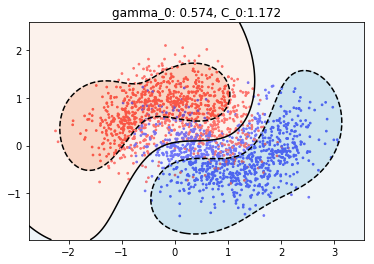

In [34]:
# train a SVM: first set the parameters and then fit to the data using the RBF kernel (default)
clf = SVC(gamma=gamma_0, C=C_0)
clf.fit(X_train,y_train)
bonnerlib.dfContour(clf,(X_test,y_test),margins = 1)
plt.title('gamma_0: {:.03f}, C_0:{:.03f}'.format(gamma_0,C_0))

## III

In this question you will fix the value of γ and vary the value of C. Generate two curves, one of test error vs log(C), and one of training error vs log(C). Use γ = γ0, and use 100 different values of log(C) equally spaced between log(C0) − 3 and log(C0) + 3. For each value of C you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease as C increases, and that the test error first tends to decrease and then increase, with its minimum very near C0. Provide an intuitive explanation of this behavior.

In [35]:
C_100 = np.logspace(np.log10(C_0)-3, np.log10(C_0)+3,num = 100)
score_train = np.zeros(100)
score_test = np.zeros(100)
for c in range(len(C_100)):
    clf = SVC(gamma=gamma_0, C=C_100[c])
    clf.fit(X_train,y_train)
    score_train[c] = clf.score(X_train,y_train)
    score_test[c] = clf.score(X_test,y_test)
    

Text(0.5, 1.0, 'Training and testing error as C varies')

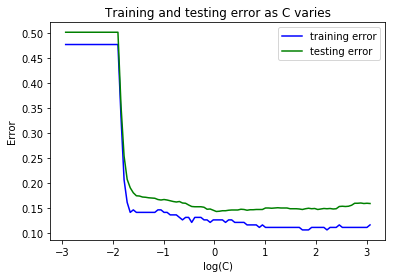

In [36]:
plt.figure()
plt.plot(np.log10(C_100),1-score_train,color='b',label='training error')
plt.plot(np.log10(C_100),1-score_test,color='g',label='testing error')
plt.legend()
plt.ylabel('Error')

# correct x ticks
# n_labels = 9
# x_axis = np.log10(C_100)
# step = int(100 / (n_labels - 1)) 
# x_labels = C_100[::step]
# plt.xticks(np.arange(0,100,step), ["{:.3f}".format(lab) for lab in C_100[::step]],rotation = 45)

plt.xlabel('log(C)')
plt.title('Training and testing error as C varies')

Discussion: as C increases, the classifier gives more weight for the misclassifed samples in the cost function and would likely to cause overfitting. This can be seen an almost monotonically decrease in the training error. The testing error decreases before C reaches C0 because the nonlinearity of the data set is not emphasized enough with small C value. As C pass over C0, the classifier starts to emphasize noise and overfits the testing data, which causes the testing error to increase as C continues to increase.

## IV

Generate 7 contour plots of the decision function for different values of C. The values of log(C) should be equally spaced between log(C0) − 3 and log(C0) + 3, inclusive. Use γ = γ0 for each value of C. Display the 7 contour plots in a single figure in a grid pattern. (You will have to use the Python function plt.subplot (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)) 
The plots should highlight the decision boundaries, but not the margins. Provide an intuitive explanation of the changes you see. (Feel free to include other figures to support your explanations.)

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


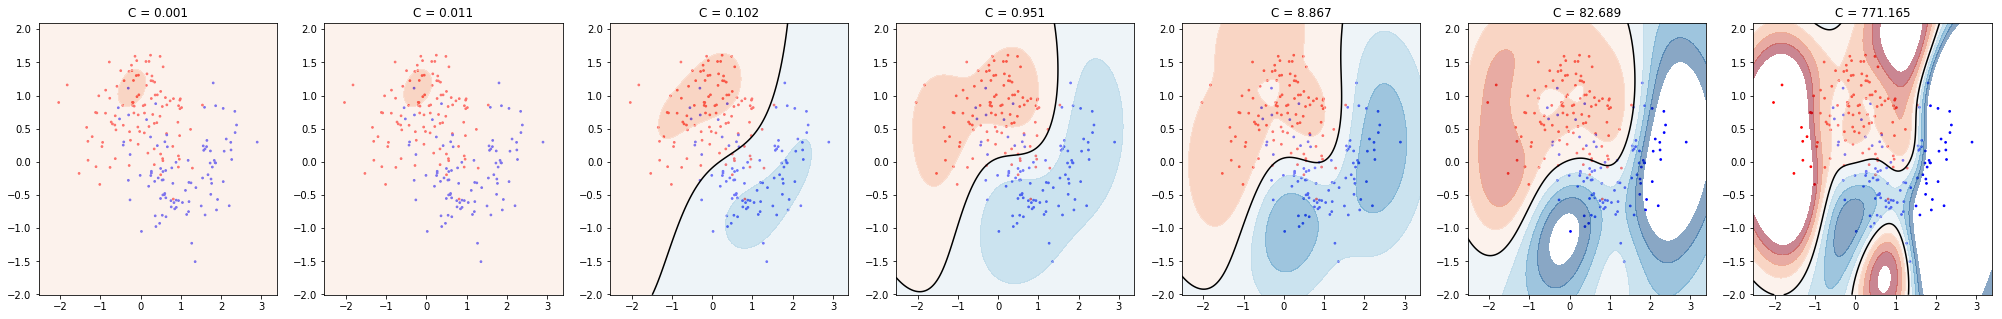

In [37]:
# IV: subplot with decision boundaries
step = int(100/(7-1))
C_7 = C_100[::step]
f, axs = plt.subplots(1,7,figsize=(35,5))
for i in range(7):
    plt.sca(axs[i])
#     plt.figsize=(15, 15)
    clf = SVC(gamma=gamma_0, C=C_7[i])
    clf.fit(X_train,y_train)
    bonnerlib.dfContour(clf,(X_train,y_train))
    plt.title('C = {:.03f}'.format(C_7[i]))


Discussion: C is introduced to tradeoff between maximizing margin and minimizing the training error. Clearly as shown in the figures above, the margin decreases as C increases as teh decision boundary is better at seperating training examples correctly. On the other hand, a low C value is shown as a simplier decision boundary, as a cost of underfit. C is a regularization parameter that controls overfitting.

## V

In this question you will fix the value of C and vary the value of γ. Generate two curves, one of test error vs log(γ), and one of training error vs log(γ). Use C = C0, and use 100 different values of log(γ) equally spaced between log(γ0) – 3 and log(γ0)+3. For each value of γ you will have to retrain and retest the SVM. Plot both curves on one set of axes, using blue for the training error and green for the test error. You should find that the training error tends to decrease as γ increases, and that the test error first tends to decrease and then increase, with its minimum very near γ0. Provide an intuitive explanation of this behavior.

In [38]:
# V: vary gamma
gamma_100 = np.logspace(np.log10(gamma_0)-3, np.log10(gamma_0)+3,num = 100)
score_train = np.zeros(100)
score_test = np.zeros(100)
for g in range(len(gamma_100)):
    clf = SVC(gamma=gamma_100[g], C=C_0)
    clf.fit(X_train,y_train)
    score_train[g] = clf.score(X_train,y_train)
    score_test[g] = clf.score(X_test,y_test)
    

Text(0.5, 1.0, 'Training and testing error as $\\gamma$ varies')

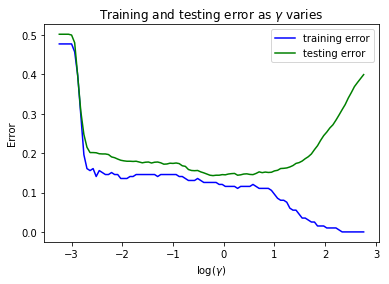

In [39]:
plt.figure()
plt.plot(np.log10(gamma_100),1-score_train,color='b',label='training error')
plt.plot(np.log10(gamma_100),1-score_test,color='g',label='testing error')
plt.legend()
plt.ylabel('Error')

# correct x ticks
# n_labels = 9
# x_axis = np.log10(C_100)
# step = int(100 / (n_labels - 1)) 
# x_labels = C_100[::step]
# plt.xticks(np.arange(0,100,step), ["{:.3f}".format(lab) for lab in C_100[::step]],rotation = 45)

plt.xlabel('log($\gamma$)')
plt.title('Training and testing error as $\gamma$ varies')

Discussion: the effect of change of $\gamma$ on overfitting and underfitting is more obvious. Intuitively, $\gamma$ defines how well the classifier can reach a single training example. A small $\gamma$ means that the classifier will ignore some incorrectly classified examples and a high $\gamma$ means to overfit the data (even captures the noise) and cause the testing error to increase.

## VI

Generate 7 contour plots of the decision function for different values of γ. The values of log(γ) should be equally spaced between log(γ0) − 3 and log(γ0) + 3, inclusive. Use C = C0 for each value of γ. Display the 7 contour plots in a single figure in a grid pattern, as in part (d). Provide an intuitive explanation of the changes you see. (Feel free to include other figures to butress your explanation.)

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


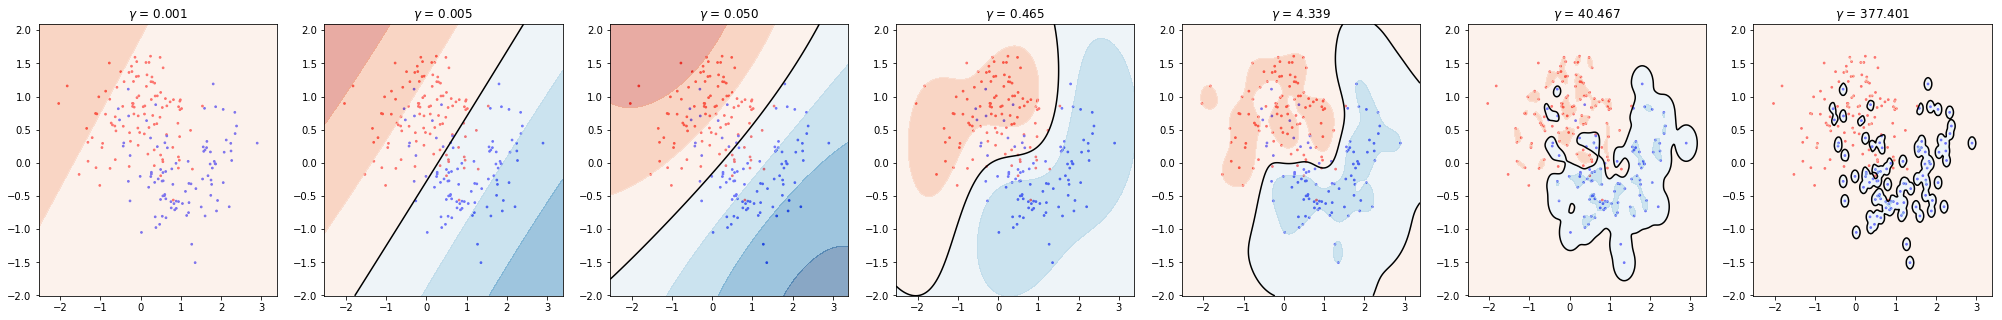

In [233]:
# VI: subplot with decision boundaries
step = int(100/(7-1))
gamma_7 = gamma_100[::step]
f, axs = plt.subplots(1,7,figsize=(35,5))
for i in range(7):
    plt.sca(axs[i])
    clf = SVC(gamma=gamma_7[i], C=C_0)
    clf.fit(X_train,y_train)
    bonnerlib.dfContour(clf,(X_train,y_train))
    plt.title('$\gamma$ = {:.03f}'.format(gamma_7[i]))

Intuitively, when $\gamma$ is too small, the model becomes over simplified and is not able to capture the complexity of the data set. On the other hand, when $\gamma$ is too large, more samples are selected as the support vectors, and the model becomes too complex and overfits the data. $\gamma$ is the inverse of the radius of support vectors, and can be seen as a way to incorporate more complexity of the model.